## Решение задачи регрессии с помощью нейронных сетей

Определение стоимости недвижимости из набора данных Boston Housing

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...).

Свою копию вы сможете изменять и запускать.


#Необходимые ресурсы

In [ ]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
#from scipy.misc import toimage
%matplotlib inline

Boston Housing price regression dataset
https://keras.io/api/datasets/boston_housing/

- Образцы содержат 13 атрибутов домов в разных местах пригорода Бостона в конце 1970-х годов.

- Цели (Targets) - это средние значения домов в определенном месте (в тыс. $).

- Сами атрибуты определены на веб-сайте StatLib http://lib.stat.cmu.edu/datasets/boston.


Variables in order:

 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000

 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's

## Подготовка данных

**Загружаем данные**

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


**Просмотр данных**

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape

(404, 13)

In [ ]:
x_test.shape

(102, 13)

In [ ]:
x_train[:3]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [ ]:
y_train[:3]

array([15.2, 42.3, 50. ])

In [ ]:
n = 0
print(x_train[n])
print(y_train[n])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


**Нормализация данных**

Вычитаем среднее значение и делим на стандартное отклонение

In [ ]:
# Среднее значение для обучающего набора данных
mean = x_train.mean(axis=0)
# Стандартное отклонение для обучающего набора данных
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

In [ ]:
print(x_train[n])
print(y_train[n])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
15.2


In [ ]:
x_train.shape

(404, 13)

In [ ]:
x_train.shape[1]

13

## Создаем нейронную сеть

Выходной слой с одним линейным нейроном - для задачи регрессии функция активации - RELU.

Конфигурация сети из примера - https://www.tensorflow.org/tutorials/keras/basic_regression

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)))
#model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(1)) # если допускаются отрицательные значения
model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,377 (21.00 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 128 (512.00 B)

None


**Компилируем сеть**

Функция ошибки - среднеквадратичное отклонение. Метрика - среднее абсолютное отклонение.

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Обучаем нейронную сеть



In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=200,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/200
12/12 - 5s - 401ms/step - loss: 517.5252 - mae: 21.1139 - val_loss: 435.2294 - val_mae: 20.0910
Epoch 2/200
12/12 - 0s - 5ms/step - loss: 418.7576 - mae: 19.0825 - val_loss: 384.7710 - val_mae: 18.9665
Epoch 3/200
12/12 - 0s - 5ms/step - loss: 342.9655 - mae: 17.0895 - val_loss: 329.7344 - val_mae: 17.6005
Epoch 4/200
12/12 - 0s - 11ms/step - loss: 270.7232 - mae: 14.8844 - val_loss: 273.6732 - val_mae: 16.0024
Epoch 5/200
12/12 - 0s - 5ms/step - loss: 222.4205 - mae: 12.8957 - val_loss: 228.5206 - val_mae: 14.5141
Epoch 6/200
12/12 - 0s - 4ms/step - loss: 205.9440 - mae: 12.1736 - val_loss: 199.0619 - val_mae: 13.4635
Epoch 7/200
12/12 - 0s - 5ms/step - loss: 168.4967 - mae: 10.3803 - val_loss: 174.1161 - val_mae: 12.4645
Epoch 8/200
12/12 - 0s - 11ms/step - loss: 166.6368 - mae: 10.1066 - val_loss: 151.4140 - val_mae: 11.3996
Epoch 9/200
12/12 - 0s - 5ms/step - loss: 149.3997 - mae: 9.4112 - val_loss: 140.9723 - val_mae: 10.8881
Epoch 10/200
12/12 - 0s - 5ms/step - loss: 

## Проверяем работу модели на тестовом наборе данных

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 9.1805 - mae: 2.2523


In [ ]:
scores

[10.371216773986816, 2.35325026512146]

In [ ]:
print("Средняя абсолютная ошибка на тестовых данных:", round(scores[1], 4))

Средняя абсолютная ошибка на тестовых данных: 2.3533


## Визуализация качества обучения

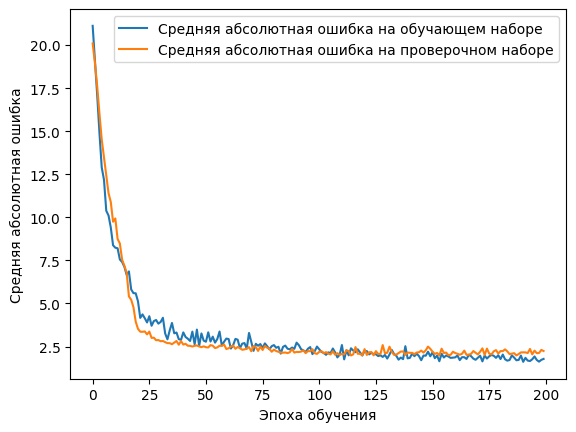

In [ ]:
plt.plot(history.history['mae'], # mean_absolute_error
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], # val_mean_absolute_error
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

## Используем модель для предсказаний

**Выполняем предсказание для тестовой выборки**

In [ ]:
pred = model.predict(x_test).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [ ]:
print(pred)

[ 9.603945 16.881067 21.058823 31.704016 24.775454 22.840685 32.292206
 21.911076 18.602297 20.220896 15.322461 17.54167  15.053415 44.807446
 23.506214 22.525246 26.483654 20.118044 19.60159  19.00487  12.146877
 12.928125 22.666111 17.60801  21.576382 23.945692 29.284353 27.252853
 12.012701 20.418509 19.725237 15.722932 31.610775 25.045694 19.130053
  8.194271 16.253767 18.546968 19.803164 26.587963 30.91533  29.708881
 14.61603  43.53238  29.22344  27.738207 29.216185 18.576992 23.587362
 22.619934 35.283424 20.222486 10.59172  13.915701 39.198463 29.083746
 12.840107 52.65483  31.689745 21.96491  23.69098  16.564114 16.005768
 20.73725  24.482836 21.13366  15.526399 22.391293 13.159341  9.484144
 16.911345 30.018785 23.827318 12.060337 27.673223 20.938417 20.013948
 25.580439 34.597157  9.979147 23.204226 39.22553  17.279192 14.550232
 17.999342 19.819677 24.582079 19.862787 23.253696 27.145426 18.935427
 21.891327 26.63035  40.598583 35.836193 19.342241 36.102863 32.841667
 27.65

**Печатаем примеры результатов**

In [ ]:
test_index=25
print("Предсказанная стоимость:", pred[test_index], ", правильная стоимость:", y_test[test_index])

Предсказанная стоимость: 23.945692 , правильная стоимость: 23.0


## Визуализируем результаты предсказаний

График предсказаний

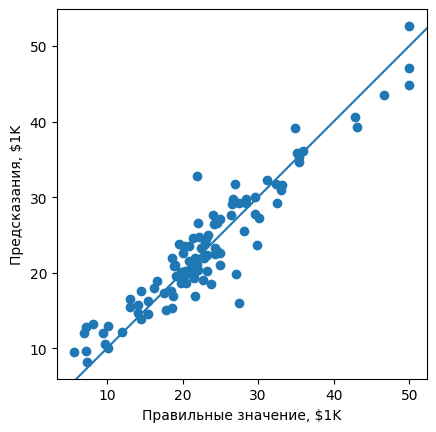

In [ ]:
plt.scatter(y_test, pred)
plt.xlabel('Правильные значение, $1K')
plt.ylabel('Предсказания, $1K')
plt.axis('equal')
plt.axis('square')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

Гистограмма ошибок

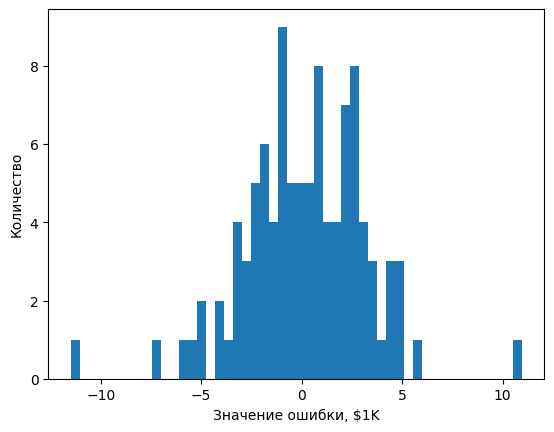

In [ ]:
error = pred - y_test
plt.hist(error, bins = 50)
plt.xlabel("Значение ошибки, $1K")
plt.ylabel("Количество")
plt.show()

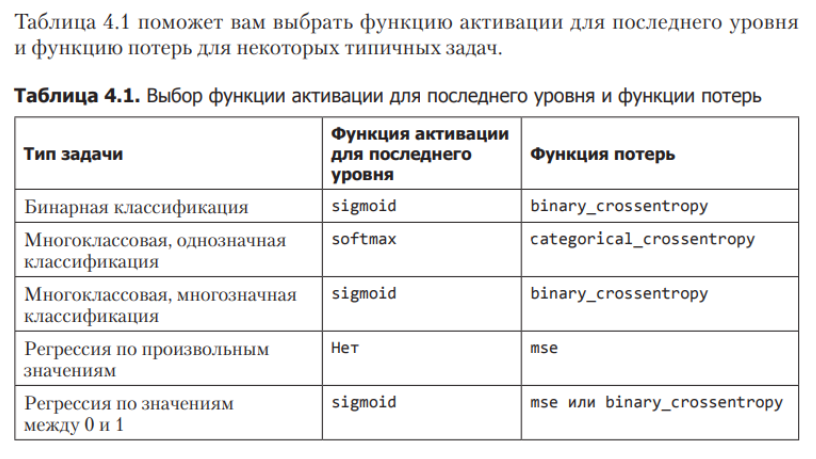

#Средняя абсолютная ошибка (mae)

**mae — mean
absolute error** (средняя абсолютная ошибка) - это абсолютное значение разности
между предсказанными и целевыми значениями (метками).
Как правило, испоьзуется для метрики в задаче регрессии.


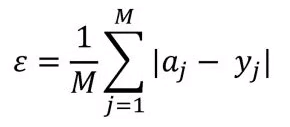

**mse — mean
squared error** (среднеквадратичная ошибка) - это квадрат разности между
предсказанными и целевыми значениями (метками). Как правило, испоьзуется для функции потерь.

# Средняя квадратичная ошибка (mse)

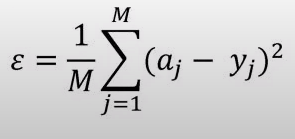

#Регуляризация - борьба с переобучением
Распространенные приемы регуляризации:

- Уменьшение размера сети - количество обучаемых параметров в модели - емкость модели (model capacity)
- Добавление регуляризации весов - уменьшении сложности сети путем ограничения значений ее весовых коэффициентов, что делает их распределение более равномерным
(подробнее читайте: Франсуа Шолле Глава 4 • Основы машинного обучения. 4.4.2. Добавление регуляризации весов)
- Добавление прореживания (dropout) к слою - удаление (присваивании нуля) случайно выбираемым признакам на этапе обучения
- Разделение данных на два набора: обучающий, проверочный
- Слой пакетной нормализации BatchNormalization

#Статьи
Обзор Keras для TensorFlow

https://habr.com/ru/post/482126/


#Задание
- Измените архитектуру нейронной сети:

 - Добавьте/удалите слои;

 - Измените количество нейронов;

- Добавьте дополнительную регуляризацию: Dropout, L2 или L1;

- Используйте разные оптимизаторы ('SGD', 'adam', 'adadelta').


- Изучите блокнот от The TensorFlow Authors

basic-regression.ipynb

https://colab.research.google.com/github/MarkDaoust/models/blob/add-regression-plots/samples/core/tutorials/keras/basic_regression.ipynb

- Изучите раздел 3.6. "Предсказание цен на дома:
пример регрессии" (стр. 111) в книге Ф. Шолле "Глубокое обучение на Python".  
- Сделайте оценку решения методом перекрестной проверки
по K блокам.


- Изучите раздел  4.4.2. Добавление регуляризации весов (стр. 136) в книге Ф. Шолле "Глубокое обучение на Python".

#Оценка решения методом перекрестной проверки  по K блокам

Источник: 3.6. Предсказание цен на дома:
пример регрессии, с. 111

### Загрузка набора данных для Бостона

In [ ]:
# Загрузка набора данных для Бостона
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

###Подготовка данных

In [ ]:
# Нормализация данных
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

###Определение модели

In [ ]:
from keras import models
from keras import layers

Поскольку нам потребуется несколько
экземпляров одной и той же модели, мы
определили функцию для ее создания

In [ ]:
def build_model():
 model = models.Sequential()
 model.add(layers.Dense(64, activation='relu',
 input_shape=(train_data.shape[1],)))
 model.add(layers.Dense(64, activation='relu'))
 model.add(layers.Dense(1))
 model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
 return model

### Перекрестная проверка по K блокам (K-fold cross-validation)

- Разделение доступных данных на K блоков (обычно K = 4 или 5).
- Создание K идентичных моделей.
- Обучение каждой на K—1 блоках с оценкой по
оставшимся блокам.
- По полученным K оценкам вычисляется среднее значение,
которое принимается как оценка модели.

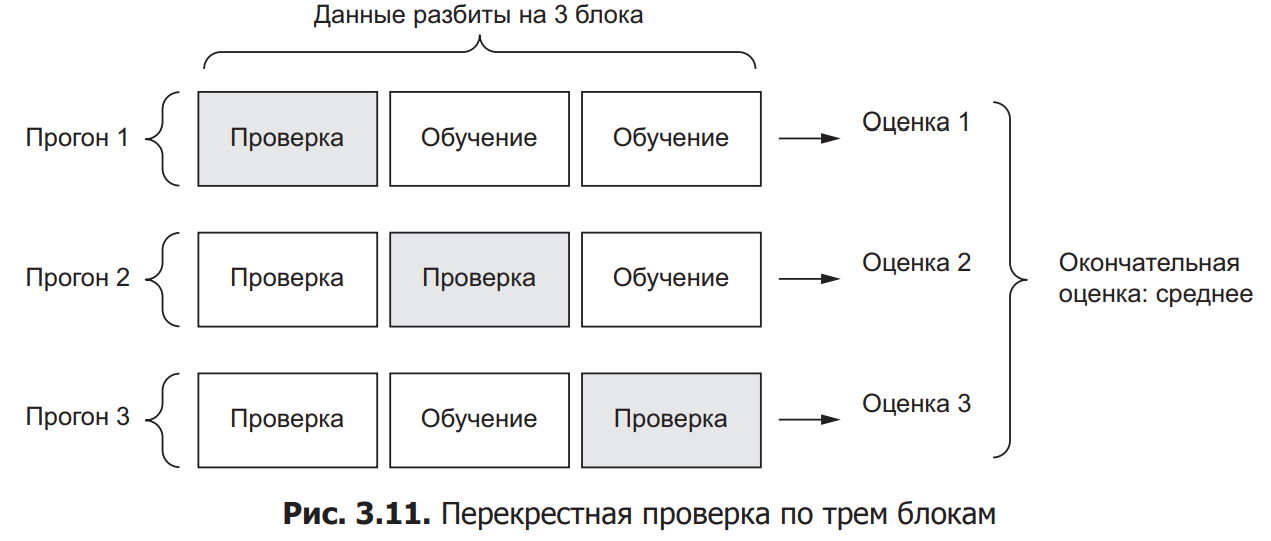

In [ ]:
import numpy as np

In [ ]:
k = 4 # определим число блоков
num_val_samples = len(train_data) // k # определим число образцов для каждого блока
num_epochs = 100 # определим число эпох для обучения
all_scores = [] # определим список для внесения результатов оценки
for i in range(k): # итерация по блокам
 print('processing fold #', i)
 # Подготовка проверочных данных: данные из блока с номером k
 val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples] # срез по образцам
 val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples] # метки
 # Подготовка обучающих данных: данные из остальных блоков
 partial_train_data = np.concatenate(
 [train_data[:i * num_val_samples],
 train_data[(i + 1) * num_val_samples:]],
 axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples],
 train_targets[(i + 1) * num_val_samples:]],
 axis=0)
 # вызов функции для создания модели
 model = build_model()
 # обучение модели
 model.fit(partial_train_data, partial_train_targets,
 epochs=num_epochs, batch_size=1, verbose=0)
 # оценка модели по проверочным данным
 val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
 all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
# посмотрим на все результаты val_mae
all_scores

[2.133918046951294, 2.226135015487671, 2.6097493171691895, 2.442025661468506]

In [ ]:
# посчитаем среднюю оценку val_mae
np.mean(all_scores)

2.352957010269165

# Вычисление средних значений метрики mae для всех прогонов

In [ ]:
num_epochs = 500 # определим число для обучения
all_mae_histories = [] # определим список для внесения результатов оценки
for i in range(k): # итерация по блокам
 print('processing fold #', i)
 # Подготовка проверочных данных: данные из блока с номером k
 val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples] # срез по образцам
 val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples] # метки
 # Подготовка обучающих данных: данные из остальных блоков
 partial_train_data = np.concatenate(
 [train_data[:i * num_val_samples],
 train_data[(i + 1) * num_val_samples:]],
 axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples],
 train_targets[(i + 1) * num_val_samples:]],
 axis=0)
 # вызов функции для создания модели
 model = build_model()
 # обучение модели с сохранением истории обучения по 'val_mean_absolute_error'
 history = model.fit(partial_train_data, partial_train_targets,
                     validation_data=(val_data, val_targets),
                     epochs=num_epochs, batch_size=1, verbose=0)
 mae_history = history.history['val_mae']
 all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
len(all_mae_histories)

4

In [ ]:
len(all_mae_histories[0])

500

###Создание истории последовательных средних оценок проверки по K блокам

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

###Формирование графика с оценками проверок

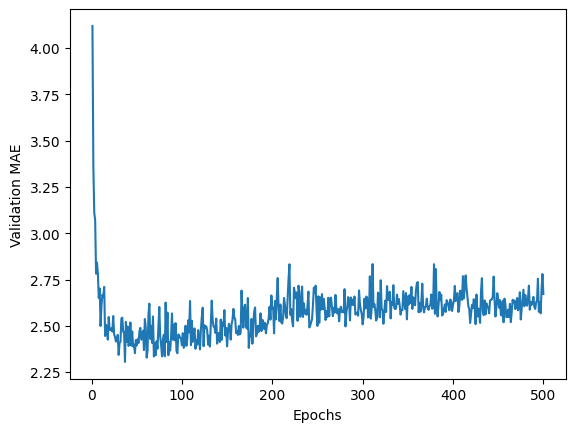

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Согласно этому графику, наилучшая оценка MAE достигается после 80 эпох. После
этого момента начинается переобучение.

##Обучение окончательной версии модели на всех данных

In [ ]:
# Получить новую скомпилированную модель
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.9237 - mae: 2.3595


In [ ]:
# окончательный результат
test_mae_score

2.4910192489624023

#Подведение итогов

- Регрессия выполняется с применением иных функций потерь, чем классификация. Для регрессии часто используется функция потерь, вычисляющая
среднеквадратичную ошибку (Mean Squared Error, MSE).
- Для регрессии используются иные метрики оценки, чем для
классификации; понятие точности неприменимо для регрессии, поэтому для
оценки качества часто применяется средняя абсолютная ошибка (Mean Absolute
Error, MAE).
- Когда признаки образцов на входе имеют значения из разных диапазонов, их
необходимо предварительно масштабировать.
- При небольшом объеме входных данных надежно оценить качество модели поможет метод перекрестной проверки по K блокам.
- При небольшом объеме обучающих данных предпочтительнее использовать маленькие сети с небольшим количеством промежуточных слоев (обычно с одним
или двумя), чтобы избежать серьезного переобучения.